# Obteniendo valores minimos para $c/a$ con su respectivo valor de energía.

## Importando liberías a utilizar

In [260]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Definiendo directorio principal

In [261]:
directorio_principal = '/home/marcocarmonaga/Documents/MoB_2-Study-Properties_Quantum_expresso/notebooks-scripts'
os.chdir(directorio_principal)

## Cambiando a carpeta sobre la que se trabajará (directorio secundario)

In [262]:
energia_total_directory = '../data/processed/energia-total-por-volumen'
os.chdir(energia_total_directory)

## Enlistando archivos dentro de la carpeta secundaria

In [263]:
files = os.listdir()
files

['187_62.csv',
 '173_46.csv',
 '180_54.csv',
 '191_16.csv',
 '159_3.csv',
 '166_38.csv',
 '177_0.csv',
 '194_7.csv',
 '169_92.csv',
 '162_84.csv',
 '184_08.csv']

## Ajustando puntos de Energía Total a polinomio de 4to grado, derivando y obteniendo valores mínimos

In [264]:
valores_minimos = list()

for file in files:
    df = pd.read_csv(file)
    c_a_valores = df['c_a_value'].to_list()
    c_a = np.array(c_a_valores)
    energia = df['Energy'].to_list()
    energia_total = np.array(energia)
    ajuste = np.polyfit(c_a,energia_total,deg=4)
    p = np.poly1d(ajuste)
    p_deriv = np.polyder(p)
    roots = np.roots(p_deriv)
    root = roots[0].real
    c_a_min = root.round(5)
    energia_min = p(root).round(5)
    volumen_str = file.rpartition('.')
    volumen = float(volumen_str[0].replace('_','.'))
    valores_minimos.append([volumen,c_a_min,energia_min])

In [265]:
valores_minimos_df = pd.DataFrame(valores_minimos, columns=['Volumen','c_a_min','Energia_min'])
valores_minimos_df = valores_minimos_df.sort_values(by='Volumen')
valores_minimos_df

,Volumen,c_a_min,Energia_min
4,159.30,1.08425,-148.54113
9,162.84,1.08725,-148.54994
5,166.38,1.09041,-148.55654
8,169.92,1.09371,-148.56112
1,173.46,1.09710,-148.56389
6,177.00,1.10063,-148.56503
2,180.54,1.10426,-148.56469
10,184.08,1.10797,-148.56302
0,187.62,1.11184,-148.56015
3,191.16,1.11573,-148.55619


## Exportando dataframe

In [266]:
valores_minimos_df.to_csv('../valores_minimos.csv',index=False)

## Exportando grafica de dataframe

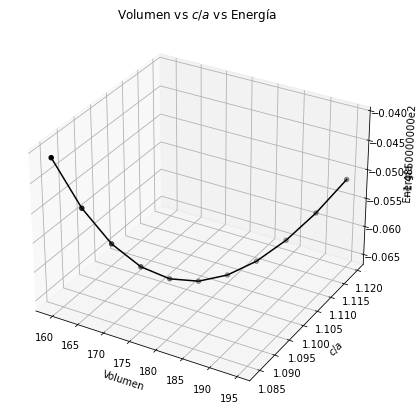

In [267]:
fig = plt.figure()
fig.set_size_inches(7,7,7)
ax = fig.add_subplot(projection='3d')
ax.scatter(valores_minimos_df['Volumen'],valores_minimos_df['c_a_min'],valores_minimos_df['Energia_min'], color='black')
ax.plot(valores_minimos_df['Volumen'],valores_minimos_df['c_a_min'],valores_minimos_df['Energia_min'], color='black')
ax.set_xlabel('Volumen')
ax.set_ylabel('$c/a$')
ax.set_zlabel('Energía')
ax.set_title('Volumen vs $c/a$ vs Energía')
plt.savefig('../../../images/valores_minimos.png')

## Regresando a directorio principal

In [268]:
os.chdir(directorio_principal)